<a href="https://colab.research.google.com/github/westefns-souza/streamlit-example/blob/master/Trabalho_analise_redes_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import pandas as pd
import networkx as nx
from pyvis.network import Network
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt

In [ ]:
def substituir_virgulas(texto):
    padrao = r'\[(.*?)\]'  # padrão para encontrar o texto entre colchetes
    matches = re.findall(padrao, texto)  # encontrar todas as ocorrências entre colchetes
    for match in matches:
        novo_texto = match.replace(',', ';')  # substituir vírgulas por ponto-e-vírgula
        texto = texto.replace(match, novo_texto)  # substituir a ocorrência original pelo novo texto
    return texto

In [ ]:
with open("/content/data_twitter.csv") as file:
  with open("/content/data_twitter_formated.csv", "w") as new_file:
      for i in range(100):
        line = file.readline() 
        new_file.write(substituir_virgulas(line))

In [ ]:
df = pd.read_csv('/content/data_twitter_formated.csv', on_bad_lines="skip")
df

,id,screenName,tags,avatar,followersCount,friendsCount,lang,lastSeen,tweetId,friends
0,1969527638,LlngoMakeEmCum_,"[ ""#nationaldogday"" ]",http://pbs.twimg.com/profile_images/5342862178...,319,112,en,1472271687519,769310701580083200,"[ ""1969574754""; ""1969295556""; ""1969284056""; ""1..."
1,51878493,_notmichelle,"[ ""#nationaldogday"" ]",http://pbs.twimg.com/profile_images/7619776021...,275,115,en,1472270622663,769309490038439936,"[ ""60789485""; ""2420931980""; ""2899776756""; ""127..."
2,1393409100,jesseayye,"[ ""#narcos"" ]",http://pbs.twimg.com/profile_images/7132829382...,120,107,en,1472804144409,771622623583186944,"[ ""86868062""; ""19697415""; ""2998836604""; ""45629..."
3,232891415,MrBrianLloyd,"[ ""#gloryoutnow"" ]",http://pbs.twimg.com/profile_images/1334406683...,492,325,en,1472269186776,769308131696467969,"[ ""361335082""; ""1405248468""; ""24626354""; ""7256..."
4,710130422907207680,sarahdorat_16,"[ ""#nationaldogday"" ]",http://pbs.twimg.com/profile_images/7671805202...,128,218,en,1472271397356,769309769144283137,"[ ""1571896093""; ""768938323612008448""; ""2548665..."
...,...,...,...,...,...,...,...,...,...,...
94,738903193,PapiaAlom,"[ ""#nationaldogday"" ]",http://pbs.twimg.com/profile_images/7682223315...,133,217,en,1472271613805,769310626942509056,[]
95,729086055274582016,LXlESGREY,"[ ""#nationaldogday"" ]",http://pbs.twimg.com/profile_images/7693020348...,440,110,en,1472266527641,769305510831067136,[]
96,166677653,AlBatrick,"[ ""#backtohogwarts"" ]",http://pbs.twimg.com/profile_images/7712955541...,1874,686,en,1472732291553,771321236026785792,"[ ""175180732""; ""127377113""; ""160253279""; ""7691..."
97,1187590927,_Mariee96,"[ ""halsey"" ]",http://pbs.twimg.com/profile_images/7621858916...,938,844,en,1472483718303,770277436386713600,"[ ""45709328""; ""37481741""; ""223047786""; ""699673..."


In [ ]:
df_reduced = df[['id', 'friends']]
df_reduced

,id,friends
0,1969527638,"[ ""1969574754""; ""1969295556""; ""1969284056""; ""1..."
1,51878493,"[ ""60789485""; ""2420931980""; ""2899776756""; ""127..."
2,1393409100,"[ ""86868062""; ""19697415""; ""2998836604""; ""45629..."
3,232891415,"[ ""361335082""; ""1405248468""; ""24626354""; ""7256..."
4,710130422907207680,"[ ""1571896093""; ""768938323612008448""; ""2548665..."
...,...,...
94,738903193,[]
95,729086055274582016,[]
96,166677653,"[ ""175180732""; ""127377113""; ""160253279""; ""7691..."
97,1187590927,"[ ""45709328""; ""37481741""; ""223047786""; ""699673..."


In [ ]:
nodes = []
edges = []

In [ ]:
for line in df_reduced.values.tolist():
  userId = int(line[0])
  nodes.append(nodes)

  friends = line[1].replace('[', '').replace('; ]', '').replace(']', '').replace('"', '').split(';')

  for friend in friends:
    friend = friend.strip()
    if friend != '':
      friend = int(friend)
      nodes.append(friend)
      edges.append([userId, friend])

In [ ]:
G = nx.Graph()

for node in list(nodes):
  if type(node) is not list:
    G.add_node(node)

for edge in list(edges):
  if type(edge) is not list:
    G.add_edge(edge)

In [ ]:
nt = Network('500px', '100%', notebook=True, cdn_resources='in_line')
nt.from_nx(G)
nt.show('grafico.html')
display(HTML('grafico.html'))

grafico.html


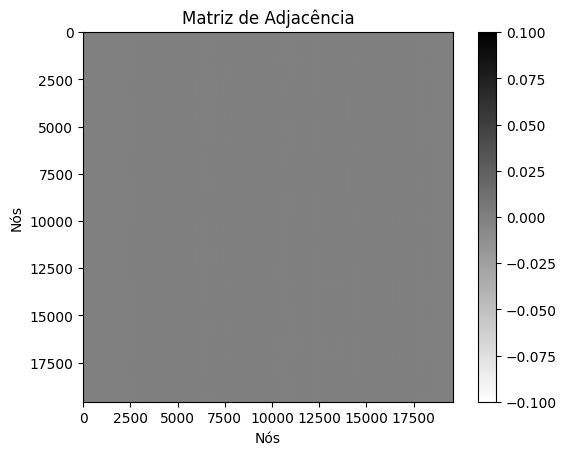

In [ ]:
# Obtendo a matriz de adjacência
adj_matrix = nx.to_pandas_adjacency(G)

plt.imshow(adj_matrix, cmap='binary', origin='upper')
plt.xlabel('Nós')
plt.ylabel('Nós')
plt.title('Matriz de Adjacência')
plt.colorbar()
plt.show()